In [17]:
%load_ext autoreload
%autoreload 2
import analysis
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
## RAMON
def calc_rg(tr):
    """
    Calculate the Rg of each chain for a trajectory
    The trajectory tr needs to be unwrapped
    """
    n = 2
    chain_atoms = tr.n_atoms//n
    print(tr.xyz.shape)
    coords = tr.xyz[300:1679]
    coords = coords.reshape([coords.shape[0],n, coords.shape[1]//n,
                             coords.shape[2]])
    com = np.mean(coords, 2)
    coords = coords-com[:,:,np.newaxis,:]
    rg = np.sqrt(np.sum((coords**2), (2,3))/566)
    return rg*10.


> Run Completed at 67.16% for PR. Ran 33580000 steps for a total of 1680 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations
36.56207733647896
32.42617484478694
31.117985295539835
30.65700843637182
30.79352173486191
32.89243058653809


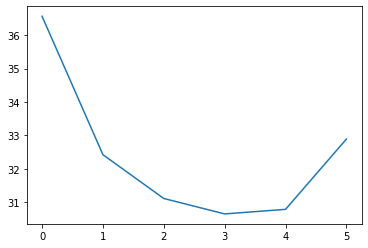

In [45]:
rg_me = analysis.Analysis(oliba_wd='/home/adria/gil/RgTest').rg()
plt.plot(rg_me.mean(axis=1), label='Analysis')
for i in range(6):
    print(rg_me[i].mean())

In [46]:
rgs = []
for T in range(5):
    t = md.load(f'/home/adria/gil/RgTest/dcd_traj_{T}.dcd', top='/home/adria/gil/RgTest/topo.pdb')
    rgs.append(calc_rg(t).mean())
rgs = np.array(rgs)

(2198, 1132, 3)
(1907, 1132, 3)
(1679, 1132, 3)
(1690, 1132, 3)
(1681, 1132, 3)


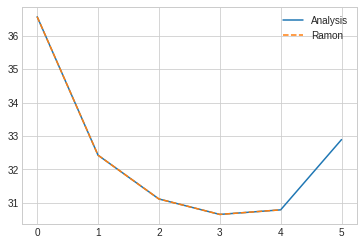

In [51]:
plt.plot(rg_me.mean(axis=1), label='Analysis')
plt.plot(rgs, '--', label='Ramon')
plt.legend()

In [48]:
print(analysis.Analysis(oliba_wd='/home/adria/gil/RgTest').structures)

> Run Completed at 67.16% for PR. Ran 33580000 steps for a total of 1680 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations
[<mdtraj.Trajectory with 1379 frames, 1132 atoms, 1132 residues, and unitcells at 0x7fdb65f21c10>, <mdtraj.Trajectory with 1379 frames, 1132 atoms, 1132 residues, and unitcells at 0x7fdb65f20cd0>, <mdtraj.Trajectory with 1379 frames, 1132 atoms, 1132 residues, and unitcells at 0x7fdb6aa42110>, <mdtraj.Trajectory with 1379 frames, 1132 atoms, 1132 residues, and unitcells at 0x7fdb69fba750>, <mdtraj.Trajectory with 1379 frames, 1132 atoms, 1132 residues, and unitcells at 0x7fdb69a5c6d0>, <mdtraj.Trajectory with 1379 frames, 1132 atoms, 1132 residues, and unitcells at 0x7fdb6997f650>]
